In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

# Ch03 无监督学习与预处理

## 3.1 无监督学习的类型

数据集的无监督变换 ( Unsupervised Transformation ) 是创建数据新的表示的算法，
与数据的原始表示相比，新的表示可能更容易被人或者其他机器学习算法理解。

无监督变换的常用方法：

-   降维 ( Dimensionality Reduction ) ：对于包含许多特征的数据的高维表示，
采用较少的特征对数据进行新的表示。
    -   降维的常见应用是将数据降为二维方便可视化。
-   聚类 ( Clustering ) ：将数据划分为不同的组，每组包含相似的内容。

## 3.2 无监督学习的困难

-   评估结果：没有标准，只能人工检查。

## 3.3 预处理与缩放

-   StandardScaler    ：确保每个特征的平均值为 0，方差为 1，使所有特征都位于同一量级。
-   RobustScaler      ：确保每个特征的统计属于都位于同一范围，中位数为 0，四分位数为 1？，从而忽略异常值
-   MinMaxScaler      ：确保所有特征都位于 0 到 1 之间
-   Normalizer        ：归一化。对每个数据点都进行缩放，使得特征向量的欧氏长度为 1。
即将数据点都投向到半径为 1 的圆上。因此，只关注数据的方向 ( 或角度 ) ，不关注数据的长度。

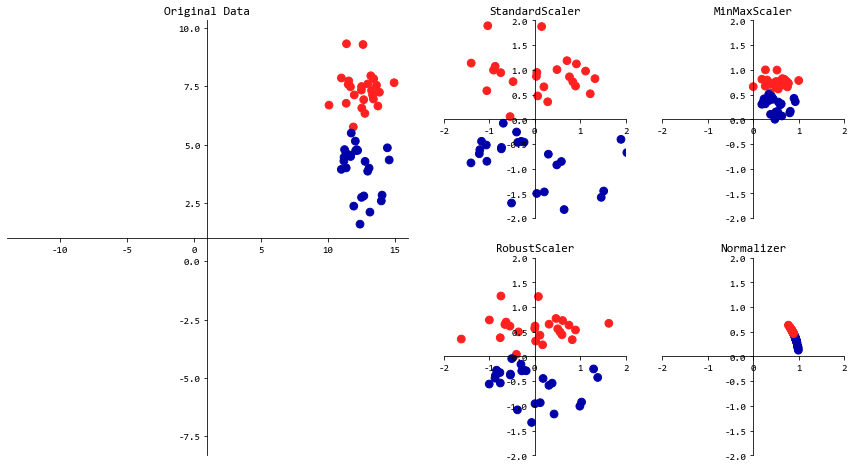

In [2]:
mglearn.plots.plot_scaling()

### 3.3.1. 不同类型的预处理
### 3.3.2. 应用数据变换
数据变换尺度比例是基于训练数据集完成的，因此测试数据集变换后区间不在 `[0,1]` 之间

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler
# 导入预处理器
scaler = MinMaxScaler()

In [5]:
# 训练预处理器
scaler.fit(X_train)

MinMaxScaler()

In [6]:
# 变换训练集数据
X_train_scaled = scaler.transform(X_train)
# 输出变换后的数据集的特征
print("变换后的数据集.shape: {}".format(X_train_scaled.shape))
print("变换前每个特征的最小值:\n {}".format(X_train.min(axis=0)))
print("变换前每个特征的最大值:\n {}".format(X_train.max(axis=0)))
print("变换后每个特征的最小值:\n {}".format(X_train_scaled.min(axis=0)))
print("变换后每个特征的最大值:\n {}".format(X_train_scaled.max(axis=0)))

变换后的数据集.shape: (426, 30)
变换前每个特征的最小值:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.      0.01    0.001   7.93   12.02   50.41  185.2
   0.071   0.027   0.      0.      0.157   0.055]
变换前每个特征的最大值:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135    0.396    0.053    0.061    0.03    36.04    49.54
  251.2   4254.       0.223    0.938    1.17     0.291    0.577    0.149]
变换后每个特征的最小值:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
变换后每个特征的最大值:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
# 变换测试集数据
X_test_scaled = scaler.transform(X_test)
# 输出变换后的数据集的特征
print("变换后每个特征的最小值:\n{}".format(X_test_scaled.min(axis=0)))
print("变换后每个特征的最大值:\n{}".format(X_test_scaled.max(axis=0)))

变换后每个特征的最小值:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.
 -0.    -0.002]
变换后每个特征的最大值:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745 0.915 1.132 1.07  0.924 1.205 1.631]


### 3.3.3. 对训练数据和测试数据执行相同的缩放处理过程

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

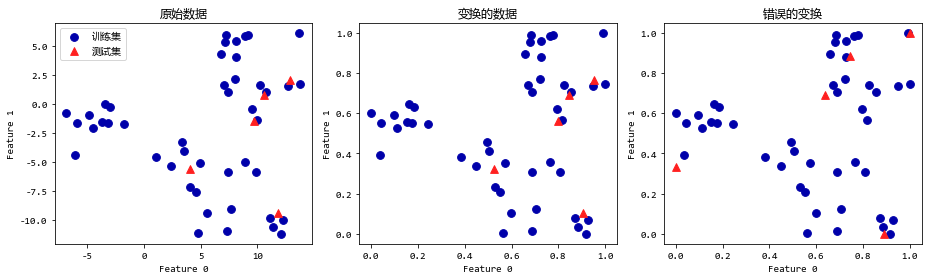

In [8]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],c=mglearn.cm2(0), label="训练集", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',c=mglearn.cm2(1), label="测试集", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("原始数据")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="训练集", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="测试集", s=60)
axes[1].set_title("变换的数据")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="训练集", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="测试集", s=60)
axes[2].set_title("错误的变换")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
# 使用方法链调用两个函数
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
# 使用一个函数完成对两个函数的调用
X_scaled_d = scaler.fit_transform(X_train)

### 3.3.4. 预处理对监督学习的作用
SVM对数据缩放比较敏感

In [10]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("测试集精度： {:.2f}".format(svm.score(X_test, y_test)))

测试集精度： 0.94


In [11]:
# 使用0-1缩放进行预处理的数据通过SVC学习
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("变换后的测试集精度: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

变换后的测试集精度: 0.97


In [12]:
# 使用0均值，1方差，缩放进行预处理的数据通过SVC学习
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("变换后的测试集精度: {:.2f}".format(svm.score(X_test_scaled, y_test)))

变换后的测试集精度: 0.96
